# Exploratory Data Analysis (EDA)

In [43]:
# Cell 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [44]:
# Cell 2: Load dataset
df = pd.read_csv("merged_data.csv")

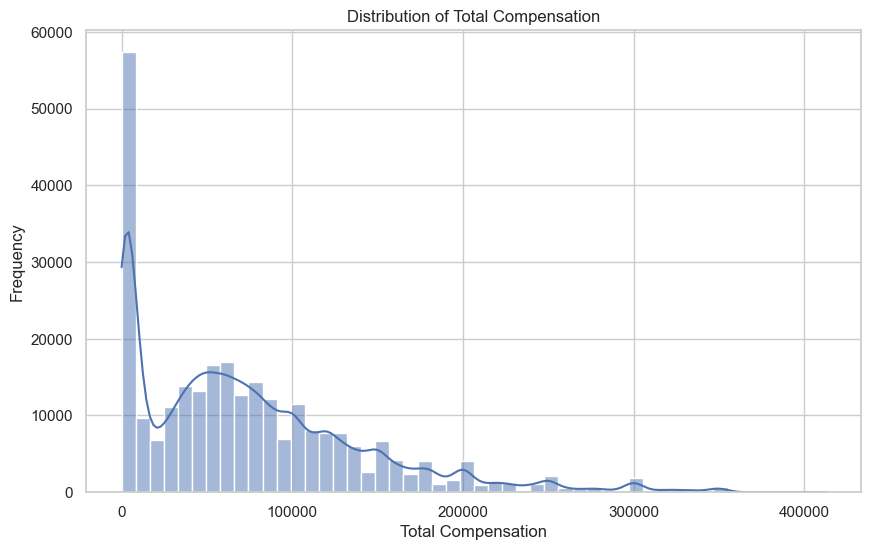

In [45]:
# Cell 3: Salary Distribution
sns.histplot(df["compensation_total"], bins=50, kde=True)
plt.title("Distribution of Total Compensation")
plt.xlabel("Total Compensation")
plt.ylabel("Frequency")
plt.show()


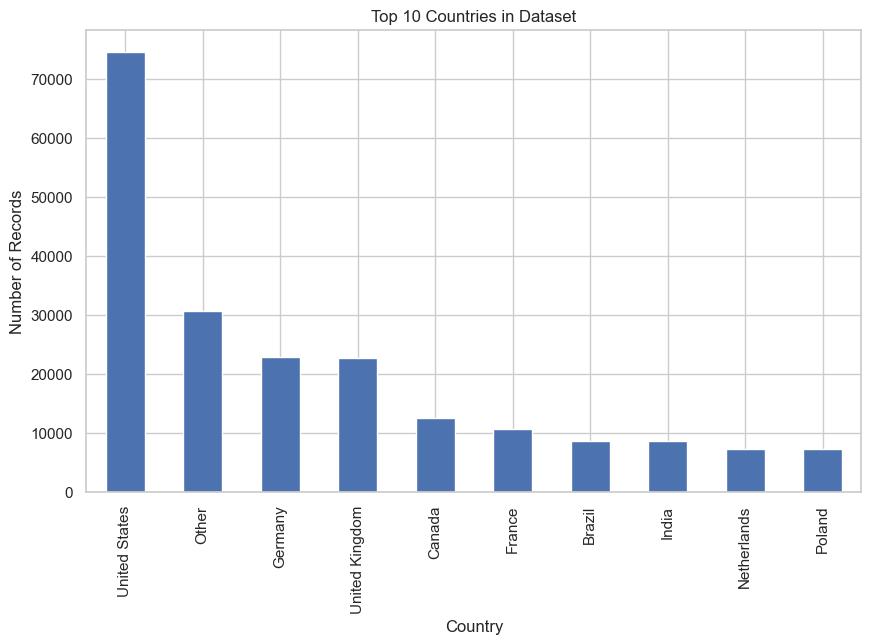

In [46]:
# Cell 4: Top 10 Countries by Record Count
df["country"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Countries in Dataset")
plt.xlabel("Country")
plt.ylabel("Number of Records")
plt.show()


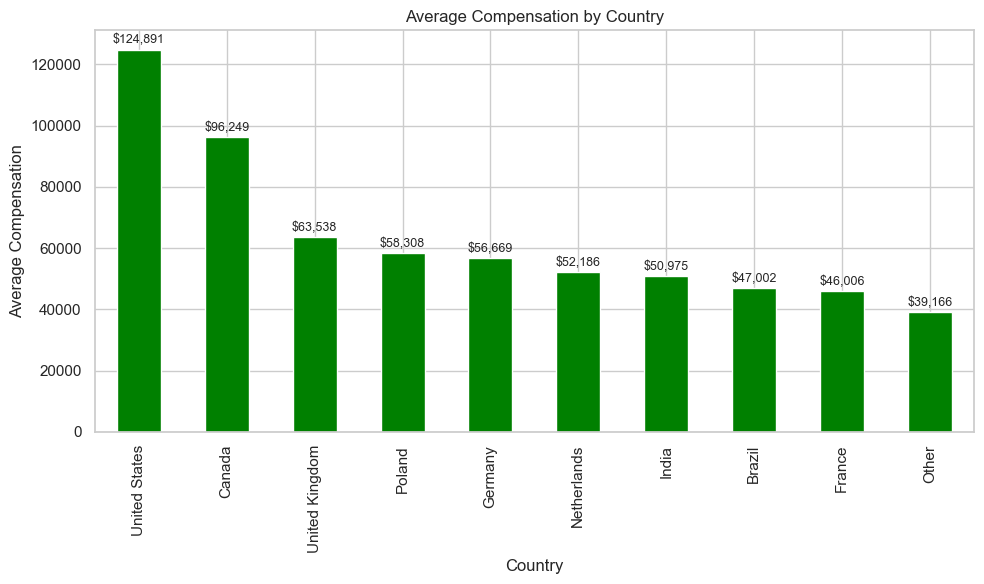

In [47]:
# Cell 5: Average Salary by Country (Top 10 by record count)
top_countries = df["country"].value_counts().head(10).index
avg_salary_by_country = df[df["country"].isin(top_countries)].groupby("country")["compensation_total"].mean().sort_values(ascending=False)

ax = avg_salary_by_country.plot(kind="bar", color="green")
plt.title("Average Compensation by Country")
plt.ylabel("Average Compensation")
plt.xlabel("Country")

# Annotate each bar with the average salary
for i, value in enumerate(avg_salary_by_country):
    plt.text(i, value + 1000, f"${value:,.0f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


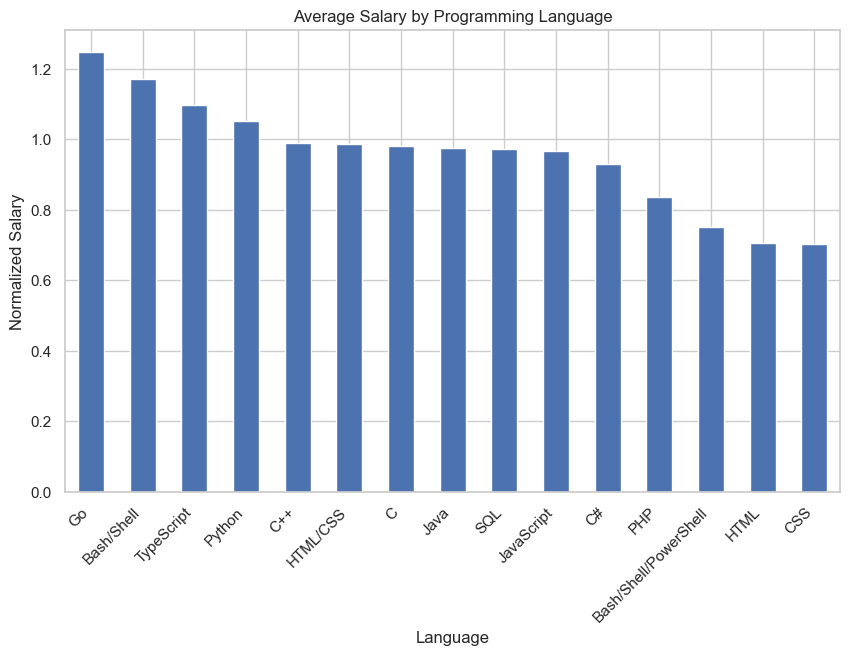

In [48]:
# Cell 6: Language skills columns
language_columns = [col for col in df.columns if col.startswith("langs_worked_")]
lang_salary = {}

for lang in language_columns:
    avg = df[df[lang] == 1]["salary_normalized"].mean()
    lang_salary[lang.replace("langs_worked_", "")] = avg

lang_salary_series = pd.Series(lang_salary).dropna().sort_values(ascending=False)

lang_salary_series.plot(kind="bar")
plt.title("Average Salary by Programming Language")
plt.ylabel("Normalized Salary")
plt.xlabel("Language")
plt.xticks(rotation=45, ha="right")
plt.show()

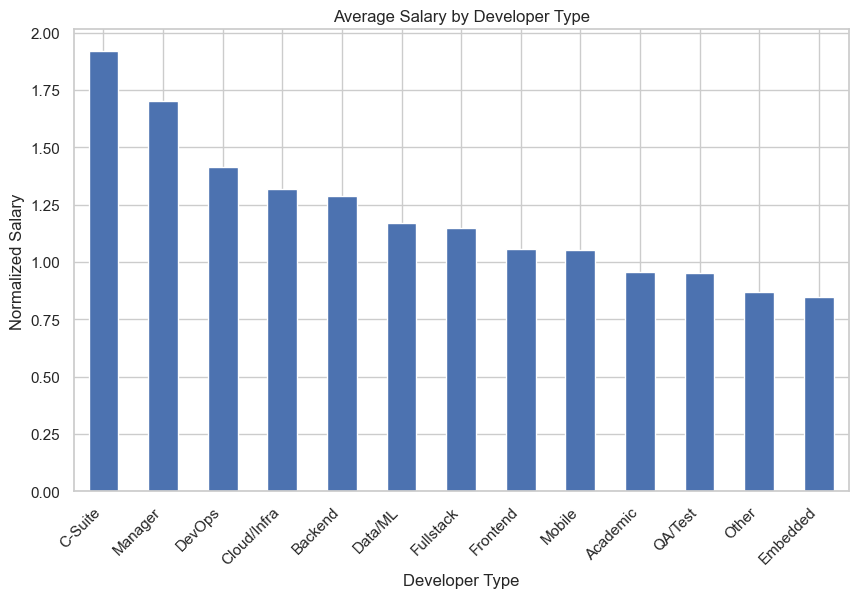

In [49]:
# Cell 7: Average Salary by Developer Type
dev_columns = [col for col in df.columns if col.startswith("dev_type_")]

dev_salary = {}
for dev in dev_columns:
    avg = df[df[dev] == True]["salary_normalized"].mean()
    dev_salary[dev.replace("dev_type_", "")] = avg

pd.Series(dev_salary).sort_values(ascending=False).plot(kind="bar")
plt.title("Average Salary by Developer Type")
plt.ylabel("Normalized Salary")
plt.xlabel("Developer Type")
plt.xticks(rotation=45, ha="right")
plt.show()


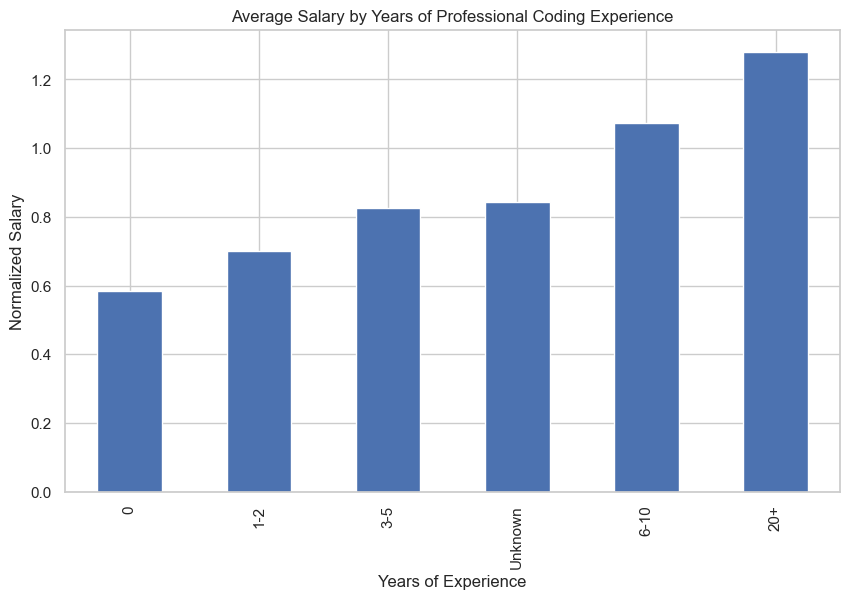

In [50]:
# Cell 8: Years of Experience vs Salary
exp_columns = [col for col in df.columns if col.startswith("years_code_pro_")]

exp_salary = {}
for exp in exp_columns:
    avg = df[df[exp] == 1]["salary_normalized"].mean()
    exp_salary[exp.replace("years_code_pro_", "")] = avg

pd.Series(exp_salary).sort_values().plot(kind="bar")
plt.title("Average Salary by Years of Professional Coding Experience")
plt.ylabel("Normalized Salary")
plt.xlabel("Years of Experience")
plt.show()


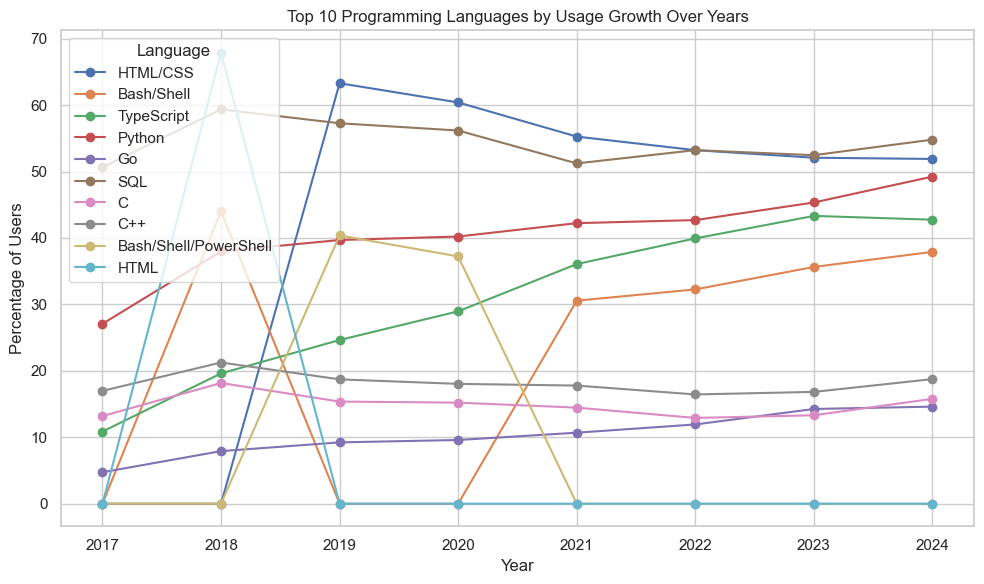

In [51]:
# Cell 9: Programming Language Growth Over Years

# 1. Extract relevant columns
language_columns = [col for col in df.columns if col.startswith("langs_worked_")]
language_columns_short = [col.replace("langs_worked_", "") for col in language_columns]

# 2. Calculate % of users per language per year
lang_growth_df = df[["year"] + language_columns].groupby("year").mean() * 100
lang_growth_df.columns = language_columns_short  # Rename columns for easier plotting

# 3. Calculate year-over-year growth (last year - first year)
lang_growth = lang_growth_df.loc[lang_growth_df.index.max()] - lang_growth_df.loc[lang_growth_df.index.min()]
lang_growth = lang_growth.sort_values(ascending=False)

# 4. Plot top 10 languages by growth
top_growth_langs = lang_growth.head(10).index
lang_growth_df[top_growth_langs].plot(marker="o")

plt.title("Top 10 Programming Languages by Usage Growth Over Years")
plt.ylabel("Percentage of Users")
plt.xlabel("Year")
plt.legend(title="Language")
plt.grid(True)
plt.tight_layout()
plt.show()


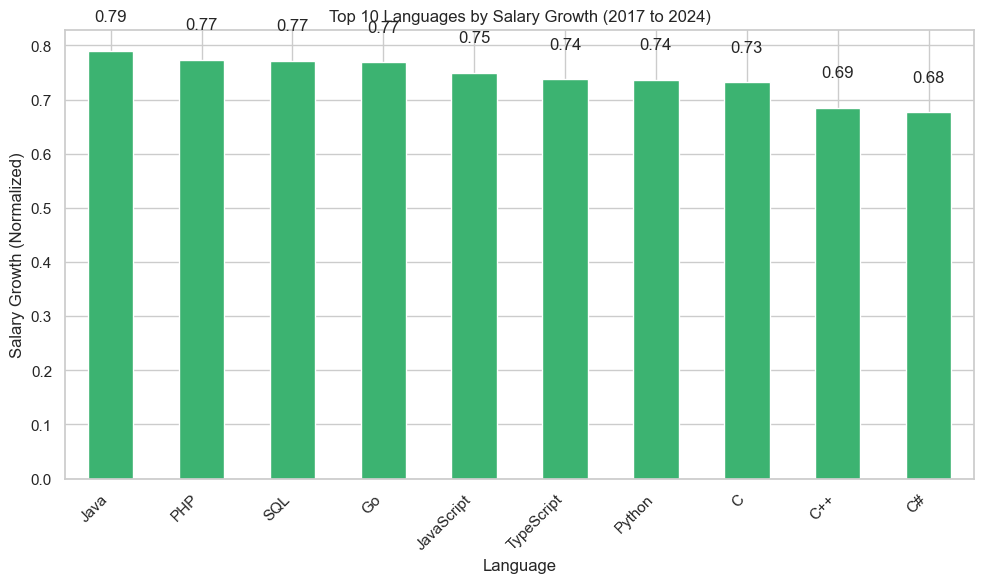

In [52]:
# Cell 10: Programming Language Salary Growth (First vs Last Year)

# Step 1: Identify language columns
language_columns = [col for col in df.columns if col.startswith("langs_worked_")]
language_short = [col.replace("langs_worked_", "") for col in language_columns]

# Step 2: Group by year and calculate average salary for each language
lang_salary_by_year = {}

for lang_col, short_name in zip(language_columns, language_short):
    yearly_avg = df[df[lang_col] == 1].groupby("year")["salary_normalized"].mean()
    lang_salary_by_year[short_name] = yearly_avg

# Step 3: Create DataFrame from dictionary
lang_salary_df = pd.DataFrame(lang_salary_by_year).T  # Transpose to have languages as rows
lang_salary_df.columns.name = "year"

# Step 4: Drop rows with missing values (languages not present in both years)
lang_salary_df = lang_salary_df.dropna(subset=[lang_salary_df.columns.min(), lang_salary_df.columns.max()])

# Step 5: Calculate growth between first and last year
first_year = lang_salary_df.columns.min()
last_year = lang_salary_df.columns.max()
lang_salary_growth = lang_salary_df[last_year] - lang_salary_df[first_year]
lang_salary_growth = lang_salary_growth.sort_values(ascending=False)

# Step 6: Plot top 10 growing languages
top_salary_growth_langs = lang_salary_growth.head(10)

ax = top_salary_growth_langs.plot(kind="bar", color="mediumseagreen")
plt.title(f"Top 10 Languages by Salary Growth ({first_year} to {last_year})")
plt.ylabel("Salary Growth (Normalized)")
plt.xlabel("Language")

# Add labels
for i, value in enumerate(top_salary_growth_langs):
    plt.text(i, value + 0.05, f"{value:.2f}", ha='center', va='bottom')

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
